In [1]:
!pip install roboflow
!pip install Pillow
!pip install ultralytics

from roboflow import Roboflow
from ultralytics import YOLO
import os
from PIL import Image
import matplotlib.pyplot as plt
import yaml
import requests
from io import BytesIO

rf = Roboflow(api_key="ppj8aAejYd6j4AXj24pf")
project = rf.workspace("val-hphzo").project("gemstones-2e1jx")
version = project.version(6)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


diamond_70_jpeg.rf.29c1eadb5395a36c0207afeb184e552b.jpg


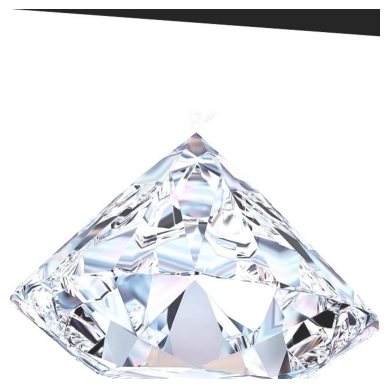

In [2]:
# Construct the path to the training, validation, and test images directories
train_images_dir = os.path.join(dataset.location, "train", "images")
val_images_dir = os.path.join(dataset.location, "valid", "images")
test_images_dir = os.path.join(dataset.location, "test", "images")

train_lables_dir = os.path.join(dataset.location, "train", "lables")
val_lables_dir = os.path.join(dataset.location, "valid", "lables")
test_lables_dir = os.path.join(dataset.location, "test", "lables")

# Get a list of image filenames in the directory
image_filenames = os.listdir(train_images_dir)

# Check if there are any images in the directory
if image_filenames:
    # Get the first image filename (you can change the index to get a different image)
    first_image_filename = image_filenames[0]

    # Construct the full path to the image
    first_image_path = os.path.join(train_images_dir, first_image_filename)

    # Open and display the image using PIL (Pillow)
    try:
        print(first_image_filename)
        img = Image.open(first_image_path)
        plt.imshow(img)  # Display image using matplotlib
        plt.axis('off')  # Optional: Turn off axis labels
        plt.show()      # Show the plot
    except FileNotFoundError:
        print(f"Error: Image not found at {first_image_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print("No images found in the training dataset.")

In [11]:
# Creating a dataset.yaml file to hold info about the datasets

import yaml

data = {
    'train': '/kaggle/working/Gemstones-6/train/images',
    'val': '/kaggle/working/Gemstones-6/valid/images',
    'test': '/kaggle/working/Gemstones-6/test/images',
    'nc': 5, # We have 5 classes
    'names': ['Ruby','Amethyst', 'Diamond', 'Emerald', 'Sapphire']
}

with open('dataset.yaml', 'w') as outfile:
    yaml.dump(data, outfile, default_flow_style=False)

print("dataset.yaml file created!")

dataset.yaml file created!


In [19]:
model = YOLO("yolo11n.pt")
model = YOLO("yolo11n.yaml").load("yolo11n.pt")  # build from YAML and transfer weights

results = model.train(
  data='dataset.yaml',
  epochs = 70,
  patience=20,
  imgsz = 650)

Transferred 499/499 items from pretrained weights
Ultralytics 8.3.94 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.yaml, data=dataset.yaml, epochs=70, time=None, patience=20, batch=16, imgsz=650, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train9, exist_ok=False, pretrained=yolo11n.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, 

train: Scanning /kaggle/working/Gemstones-6/train/labels.cache... 597 images, 0 backgrounds, 0 corrupt: 100%|██████████| 597/597 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /kaggle/working/Gemstones-6/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to runs/detect/train9/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 672 train, 672 val
Using 2 dataloader workers
Logging results to runs/detect/train9
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/70      2.48G      0.985      3.238      1.337         19        672: 100%|██████████| 38/38 [00:07<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]

                   all         49         99     0.0245      0.942      0.233      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/70      2.66G      1.023      2.396      1.346         27        672: 100%|██████████| 38/38 [00:07<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]

                   all         49         99      0.425      0.172      0.354      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/70      2.66G      1.066      1.856      1.347         12        672: 100%|██████████| 38/38 [00:07<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]

                   all         49         99      0.345      0.351      0.364      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/70      2.66G        1.1      1.692      1.332         17        672: 100%|██████████| 38/38 [00:07<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.26it/s]

                   all         49         99      0.639      0.513       0.47      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/70      2.66G      1.023      1.562      1.303         26        672: 100%|██████████| 38/38 [00:07<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]

                   all         49         99      0.705      0.851      0.831      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/70      2.66G     0.9888      1.461       1.27         12        672: 100%|██████████| 38/38 [00:07<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.13it/s]

                   all         49         99      0.759      0.725      0.793      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/70      2.66G     0.9726      1.348       1.27         15        672: 100%|██████████| 38/38 [00:07<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.35it/s]

                   all         49         99      0.717      0.635      0.685      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/70      2.66G       1.02      1.325      1.278         18        672: 100%|██████████| 38/38 [00:07<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]

                   all         49         99      0.519      0.753      0.658      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/70      2.66G     0.9877      1.239      1.265         19        672: 100%|██████████| 38/38 [00:07<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.23it/s]

                   all         49         99      0.621      0.648      0.659      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/70      2.66G     0.9624      1.155      1.242         21        672: 100%|██████████| 38/38 [00:07<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.65it/s]

                   all         49         99      0.708      0.847      0.838      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/70      2.66G     0.9519      1.164      1.242         17        672: 100%|██████████| 38/38 [00:07<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.38it/s]

                   all         49         99      0.684      0.862      0.804        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/70      2.66G      0.937      1.073      1.223         13        672: 100%|██████████| 38/38 [00:07<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.13it/s]

                   all         49         99      0.758      0.822      0.832      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/70      2.66G     0.9181      1.063      1.213         14        672: 100%|██████████| 38/38 [00:07<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.64it/s]

                   all         49         99      0.718      0.782      0.803       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/70      2.66G     0.9332      1.061      1.219         12        672: 100%|██████████| 38/38 [00:07<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.05it/s]

                   all         49         99      0.867      0.624      0.713      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/70      2.66G     0.8951     0.9739      1.206         19        672: 100%|██████████| 38/38 [00:07<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.91it/s]

                   all         49         99      0.718      0.872      0.811      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/70      2.66G     0.8969     0.9763      1.187         15        672: 100%|██████████| 38/38 [00:07<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.43it/s]

                   all         49         99      0.727      0.913      0.854      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/70      2.66G     0.9186     0.9747      1.224         14        672: 100%|██████████| 38/38 [00:07<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.47it/s]

                   all         49         99       0.81      0.885      0.939      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/70      2.66G     0.9184     0.9309      1.207         10        672: 100%|██████████| 38/38 [00:07<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]


                   all         49         99      0.729      0.815      0.881      0.663

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/70      2.66G     0.8841     0.8875      1.187         19        672: 100%|██████████| 38/38 [00:07<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.35it/s]

                   all         49         99      0.792      0.898      0.846      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/70      2.66G     0.8684      0.903      1.203         25        672: 100%|██████████| 38/38 [00:07<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.04it/s]

                   all         49         99      0.732      0.887      0.828      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/70      2.66G     0.8815     0.8561      1.186         20        672: 100%|██████████| 38/38 [00:07<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.54it/s]

                   all         49         99       0.79      0.898      0.877      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/70      2.66G     0.8777     0.8465      1.202         20        672: 100%|██████████| 38/38 [00:07<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.32it/s]

                   all         49         99      0.786      0.832      0.863      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/70      2.66G     0.8774     0.8558       1.18          7        672: 100%|██████████| 38/38 [00:07<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.22it/s]

                   all         49         99      0.828      0.939      0.915       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/70      2.66G     0.8515     0.8112       1.16         14        672: 100%|██████████| 38/38 [00:07<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.55it/s]

                   all         49         99      0.786      0.931      0.889      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/70      2.66G     0.8463     0.7788      1.172         15        672: 100%|██████████| 38/38 [00:07<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.27it/s]

                   all         49         99      0.651      0.748      0.759      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/70      2.66G     0.8346     0.7511      1.148         21        672: 100%|██████████| 38/38 [00:07<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.52it/s]

                   all         49         99      0.789      0.882       0.88      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/70      2.66G     0.8399     0.7881      1.156         15        672: 100%|██████████| 38/38 [00:07<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.53it/s]

                   all         49         99      0.733      0.918       0.84      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/70      2.66G     0.8232     0.7345      1.155         15        672: 100%|██████████| 38/38 [00:07<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.17it/s]

                   all         49         99      0.808      0.848      0.868       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/70      2.66G     0.7877     0.7176      1.125         14        672: 100%|██████████| 38/38 [00:07<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.31it/s]

                   all         49         99      0.732      0.859      0.845      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/70      2.66G     0.7996     0.6906      1.132         18        672: 100%|██████████| 38/38 [00:07<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.96it/s]

                   all         49         99      0.869      0.906       0.93      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/70      2.66G     0.7688     0.6723      1.128         14        672: 100%|██████████| 38/38 [00:07<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.12it/s]

                   all         49         99      0.791      0.935      0.887      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/70      2.66G     0.7941     0.7062      1.136         27        672: 100%|██████████| 38/38 [00:07<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.82it/s]

                   all         49         99      0.817      0.823        0.9      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/70      2.66G     0.8045      0.686      1.133         26        672: 100%|██████████| 38/38 [00:07<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.09it/s]

                   all         49         99      0.769      0.911      0.847      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/70      2.66G     0.8048     0.7196      1.137         14        672: 100%|██████████| 38/38 [00:07<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.00it/s]

                   all         49         99      0.809      0.924      0.902      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/70      2.66G     0.7733     0.6664      1.118         30        672: 100%|██████████| 38/38 [00:07<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.08it/s]

                   all         49         99      0.774      0.885      0.859      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/70      2.66G     0.8028     0.6841      1.133         13        672: 100%|██████████| 38/38 [00:07<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.95it/s]

                   all         49         99      0.816        0.9      0.917      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/70      2.66G     0.7509     0.6145      1.104         15        672: 100%|██████████| 38/38 [00:07<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.02it/s]

                   all         49         99      0.789      0.881      0.837      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/70      2.66G     0.7635      0.645       1.12         18        672: 100%|██████████| 38/38 [00:07<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.02it/s]

                   all         49         99      0.783      0.688      0.732      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/70      2.66G     0.7593     0.6244      1.109         18        672: 100%|██████████| 38/38 [00:07<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.47it/s]

                   all         49         99      0.794      0.817      0.843      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/70      2.66G     0.7337     0.6171      1.102          9        672: 100%|██████████| 38/38 [00:07<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.24it/s]

                   all         49         99      0.782      0.915      0.879      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/70      2.66G     0.7269     0.5816      1.097         14        672: 100%|██████████| 38/38 [00:07<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.58it/s]

                   all         49         99      0.812      0.933      0.922      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/70      2.66G     0.7623     0.5828      1.107         13        672: 100%|██████████| 38/38 [00:07<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.73it/s]

                   all         49         99      0.823      0.921      0.901      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/70      2.66G     0.7121     0.5727      1.086         13        672: 100%|██████████| 38/38 [00:07<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.93it/s]

                   all         49         99      0.786      0.767      0.878      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/70      2.66G     0.7385     0.5749      1.109         21        672: 100%|██████████| 38/38 [00:07<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.22it/s]

                   all         49         99      0.761      0.897      0.919      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/70      2.66G      0.725     0.5614      1.099         16        672: 100%|██████████| 38/38 [00:07<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.17it/s]

                   all         49         99      0.809      0.885      0.872      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/70      2.66G     0.7132      0.546       1.07          8        672: 100%|██████████| 38/38 [00:07<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]

                   all         49         99      0.831      0.857      0.927      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/70      2.66G      0.694     0.5438      1.073         15        672: 100%|██████████| 38/38 [00:07<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.61it/s]

                   all         49         99      0.829      0.862      0.898      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/70      2.66G      0.718     0.5539      1.079         18        672: 100%|██████████| 38/38 [00:07<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.65it/s]

                   all         49         99      0.806      0.932      0.929      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/70      2.66G     0.7296      0.567      1.089         22        672: 100%|██████████| 38/38 [00:07<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.29it/s]

                   all         49         99       0.83      0.859      0.915      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/70      2.66G     0.7068     0.5447      1.093         13        672: 100%|██████████| 38/38 [00:07<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.79it/s]

                   all         49         99      0.788      0.911      0.924      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/70      2.66G     0.6865     0.5244      1.073         10        672: 100%|██████████| 38/38 [00:07<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.87it/s]

                   all         49         99      0.795      0.914      0.933      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/70      2.66G     0.6744     0.5562      1.065          6        672: 100%|██████████| 38/38 [00:07<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.14it/s]

                   all         49         99       0.79      0.901      0.894      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/70      2.66G     0.6669     0.5334      1.067         25        672: 100%|██████████| 38/38 [00:07<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.94it/s]

                   all         49         99      0.795      0.909      0.908      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/70      2.66G     0.6837     0.5101      1.059         15        672: 100%|██████████| 38/38 [00:07<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.79it/s]

                   all         49         99      0.796      0.922      0.931      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/70      2.66G      0.676     0.4953      1.047         25        672: 100%|██████████| 38/38 [00:07<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.83it/s]

                   all         49         99      0.782      0.939      0.912       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/70      2.66G     0.6688     0.5164      1.055         27        672: 100%|██████████| 38/38 [00:07<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.24it/s]

                   all         49         99      0.796      0.949       0.94      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/70      2.66G     0.6789     0.4918       1.05         16        672: 100%|██████████| 38/38 [00:07<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.20it/s]

                   all         49         99      0.809      0.932      0.924      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/70      2.66G     0.6656     0.4755      1.054         10        672: 100%|██████████| 38/38 [00:07<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.53it/s]

                   all         49         99      0.824      0.921        0.9      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/70      2.66G      0.635     0.4862       1.04         12        672: 100%|██████████| 38/38 [00:07<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.28it/s]

                   all         49         99      0.847       0.88      0.924      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/70      2.66G      0.652     0.4832      1.045         21        672: 100%|██████████| 38/38 [00:07<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.46it/s]

                   all         49         99      0.877      0.862      0.941      0.737


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/70      2.66G     0.6011       0.46      1.008          6        672: 100%|██████████| 38/38 [00:08<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.50it/s]

                   all         49         99      0.855      0.897      0.944      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/70      2.66G     0.5873     0.4122      1.004          7        672: 100%|██████████| 38/38 [00:07<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.00it/s]

                   all         49         99      0.803      0.914      0.932      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/70      2.66G     0.5951     0.4218     0.9968         27        672: 100%|██████████| 38/38 [00:07<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.80it/s]

                   all         49         99      0.808       0.92      0.923      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/70      2.66G     0.5661     0.4072      1.004         10        672: 100%|██████████| 38/38 [00:07<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.91it/s]

                   all         49         99      0.828      0.925      0.918      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/70      2.66G     0.5696     0.4117          1          8        672: 100%|██████████| 38/38 [00:07<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.78it/s]

                   all         49         99      0.854      0.887      0.932      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/70      2.66G     0.5456     0.3684     0.9788          9        672: 100%|██████████| 38/38 [00:07<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.98it/s]

                   all         49         99      0.874      0.869      0.926      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/70      2.66G      0.539     0.3785     0.9765          8        672: 100%|██████████| 38/38 [00:07<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.90it/s]

                   all         49         99      0.877      0.869      0.928      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/70      2.66G     0.5519      0.384     0.9746          7        672: 100%|██████████| 38/38 [00:07<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.49it/s]

                   all         49         99      0.873       0.88      0.916      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/70      2.66G     0.5571     0.3853      1.001         10        672: 100%|██████████| 38/38 [00:07<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.21it/s]

                   all         49         99      0.868      0.915      0.917       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/70      2.66G     0.5451     0.3781     0.9692          8        672: 100%|██████████| 38/38 [00:07<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.39it/s]

                   all         49         99      0.875      0.901      0.919      0.738



70 epochs completed in 0.157 hours.
Optimizer stripped from runs/detect/train9/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train9/weights/best.pt, 5.5MB

Validating runs/detect/train9/weights/best.pt...
Ultralytics 8.3.94 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.56it/s]


                   all         49         99      0.854      0.887      0.932      0.753
                  Ruby          8         16      0.996          1      0.995      0.967
              Amethyst         19         43      0.903      0.628      0.869      0.648
               Diamond          1          7      0.991          1      0.995      0.753
               Emerald         14         19       0.72      0.948      0.951      0.847
              Sapphire          7         14      0.661      0.857      0.851      0.553


invalid value encountered in less
invalid value encountered in less


Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train9


In [20]:
# Getting the precision for each class

metrics = model.val()
for i, class_name in enumerate(model.names): #model.names contains the class names
    precision = metrics.box.p[i]
    print(f"Class: {class_name}, Precision: {precision}")

Ultralytics 8.3.94 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /kaggle/working/Gemstones-6/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]


                   all         49         99      0.854      0.886      0.932      0.755
                  Ruby          8         16      0.996          1      0.995      0.973
              Amethyst         19         43        0.9      0.628      0.867      0.646
               Diamond          1          7      0.991          1      0.995      0.753
               Emerald         14         19      0.721      0.947      0.951      0.848
              Sapphire          7         14       0.66      0.857      0.851      0.553


invalid value encountered in less
invalid value encountered in less


Speed: 8.8ms preprocess, 7.4ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to runs/detect/train92
Class: 0, Precision: 0.9962179859712936
Class: 1, Precision: 0.9000946383833938
Class: 2, Precision: 0.990670774261461
Class: 3, Precision: 0.7205445565871098
Class: 4, Precision: 0.6604438887137419


In [21]:
# Calculating the weighted average of the precision

precisions = metrics.box.p
weighted_average = (precisions[0]*8 + 19*precisions[1] + precisions[2] + precisions[3]*14 + precisions[4]*7)/49
weighted_average

0.8321008939700414

In [22]:
test_metrics = model.val(data='dataset.yaml', split='test') # explicitly set split to test.
print(metrics.box.p)

Ultralytics 8.3.94 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /kaggle/working/Gemstones-6/test/labels.cache... 29 images, 0 backgrounds, 0 corrupt: 100%|██████████| 29/29 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]


                   all         29         57      0.832      0.735      0.817      0.699
                  Ruby          3          7      0.762          1      0.862      0.781
              Amethyst         11         14      0.781      0.766      0.803      0.667
               Diamond          1         11          1          0      0.633      0.481
               Emerald          7         14      0.869          1      0.943      0.784
              Sapphire          7         11      0.748      0.909      0.841      0.781


invalid value encountered in less
invalid value encountered in less


Speed: 3.7ms preprocess, 5.6ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train93
[    0.99622     0.90009     0.99067     0.72054     0.66044]


In [23]:
precisions = test_metrics.box.p
weighted_average = (precisions[0]*3 + 11*precisions[1] + precisions[2] + precisions[3]*7 + precisions[4]*7)/29
weighted_average

0.8001099971972488

In [27]:
model.export(format='onnx')

Ultralytics 8.3.94 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/train9/weights/best.pt' with input shape (1, 3, 672, 672) BCHW and output shape(s) (1, 9, 9261) (5.2 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.48...
ONNX: export success ✅ 1.3s, saved as 'runs/detect/train9/weights/best.onnx' (10.1 MB)

Export complete (1.6s)
Results saved to /kaggle/working/runs/detect/train9/weights
Predict:         yolo predict task=detect model=runs/detect/train9/weights/best.onnx imgsz=672  
Validate:        yolo val task=detect model=runs/detect/train9/weights/best.onnx imgsz=672 data=dataset.yaml  
Visualize:       https://netron.app


'runs/detect/train9/weights/best.onnx'


0: 672x512 1 Sapphire, 9.4ms
Speed: 2.6ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 672, 512)


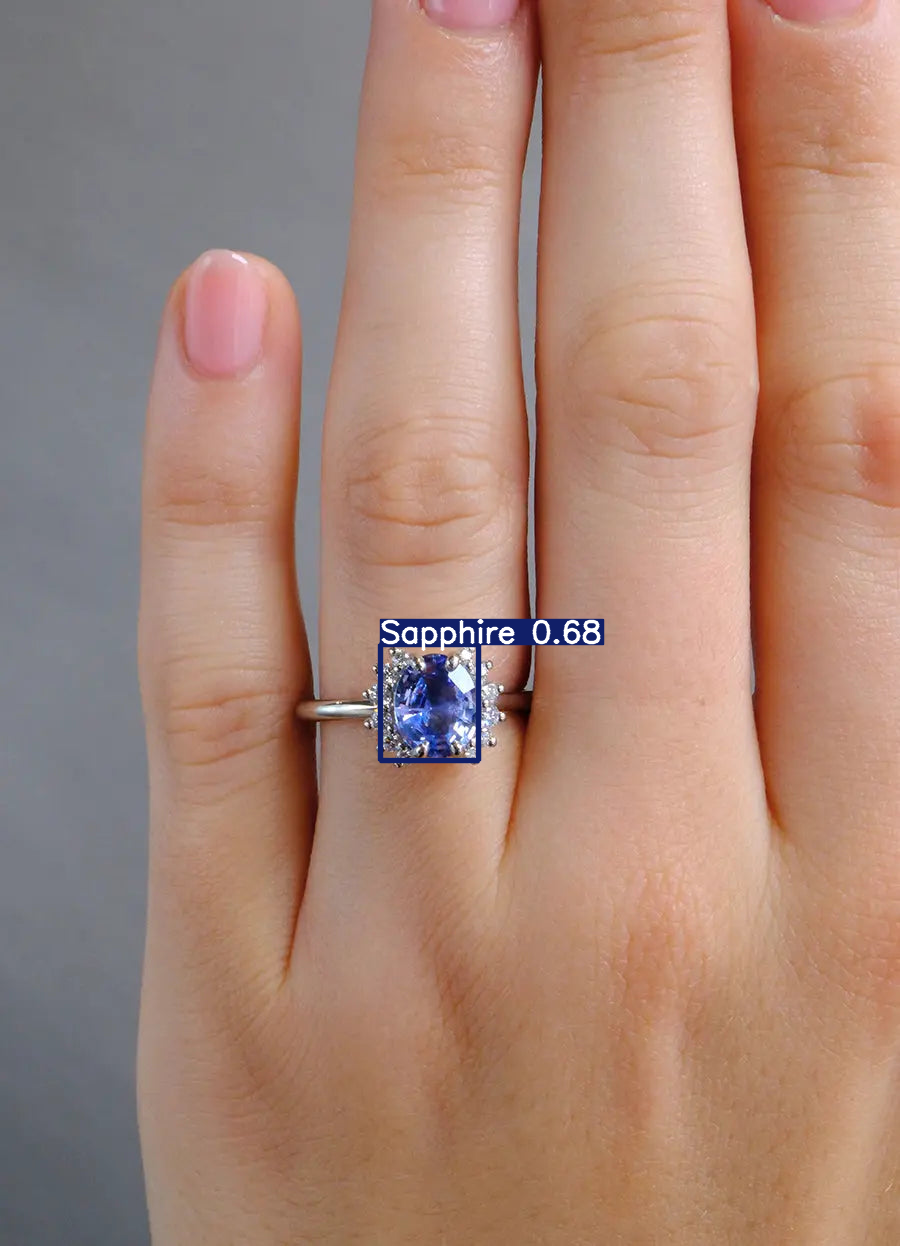

In [ ]:
def predict_from_url(image_url):
    """Predicts gems in an image from a URL.
    Returns a list of predictions, their bounding boxes, anbd their certainty"""

    try:
        # Download the image
        response = requests.get(image_url, stream=True)
        response.raise_for_status()  # Raise an exception for bad status codes (4xx or 5xx)

        # Determine image format
        image_format = None
        if "." in image_url:
            ext = os.path.splitext(image_url)[1].lower()
            if ext in ['.jpg', '.jpeg']:
                image_format = "JPEG"
            elif ext == '.png':
                image_format = "PNG"
            elif ext == '.gif':
                image_format = "GIF"
            elif ext == '.bmp':
                image_format = "BMP"
            elif ext in ['.tiff', '.tif']:
                image_format = "TIFF"
            elif ext == '.webp':
                image_format = "WEBP"
            else:
                image_format = None

        if not image_format and "Content-Type" in response.headers:
            content_type = response.headers["Content-Type"]
            if "image/jpeg" in content_type:
                image_format = "JPEG"
            elif "image/png" in content_type:
                image_format = "PNG"
            elif "image/gif" in content_type:
                image_format = "GIF"
            elif "image/bmp" in content_type:
                image_format = "BMP"
            elif "image/tiff" in content_type:
                image_format = "TIFF"
            elif "image/webp" in content_type:
                image_format = "WEBP"

        if not image_format:
            raise ValueError("Could not determine image format.")

        # Load the image using PIL with format specification
        image = Image.open(BytesIO(response.content), formats=[image_format])

        # Make predictions
        results = model.predict(image)

        # Process and display results
        for result in results:
            boxes = result.boxes.xyxy.tolist()  # Bounding box coordinates
            class_ids = result.boxes.cls.tolist()  # Class IDs
            confidences = result.boxes.conf.tolist() # Confidence values

            for box, class_id, confidence in zip(boxes, class_ids, confidences):
                print(f'''Box: {box},
                      Class: {model.names[int(class_id)]},
                      Confidence: {confidence}''')

        # Display the image with bounding boxes
        results[0].show()

    except requests.exceptions.RequestException as e:
        print(f"Error downloading image: {e}")
    except ValueError as e:
        print(f"Error determining image format: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")